(720, 1280, 3)


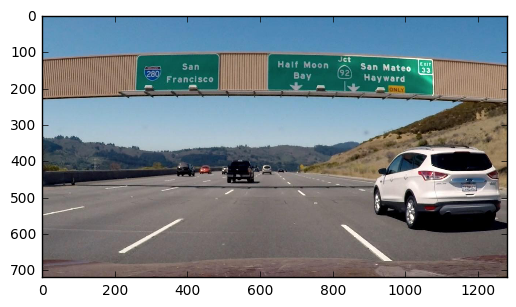

In [2]:
# READING IMAGE #
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

image = mpimg.imread('./signs_vehicles.png')
plt.imshow(image)
print(image.shape)

In [1]:
def gray_cvt(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    gray = graycvt(img)
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    elif orient == 'y':
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0])&(scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0,255)):
    gray = graycvt(image)
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobelxy = np.sqrt(sobelx**2+sobely**2)
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    mag_binary = np.zeros_like(scaled_sobel)
    mag_binary[(scaled_sobel >= mag_thresh[0])&(scaled_sobel <= mag_thresh[1])]=1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    gray = graycvt(image)
    abs_sobelx = np.absolute(cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel))
    grad_dir = np.arctan2(abs_sobely,abs_sobelx)
    dir_binary = np.zeros_like(grad_dir)
    dir_binary[(grad_dir >= thresh[0])&(grad_dir <= thresh[1])] = 1
    return dir_binary

    

NameError: name 'np' is not defined

In [4]:
ksize =9 #chose a larger odd number to smooth gradient measurements

gradx = abs_sobel_thresh(image,orient='x',sobel_kernel=ksize,thresh=(30,100))
grady = abs_sobel_thresh(image,orient='y',sobel_kernel=ksize,thresh=(30,100))
mag_binary=mag_thresh(image,sobel_kernel=ksize,mag_thresh=(30,100))
dir_binary=dir_threshold(image,sobel_kernel=ksize,thresh=(0,np.pi/8))

[[ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]
 [ 0.  0.  0. ...,  1.  1.  0.]]


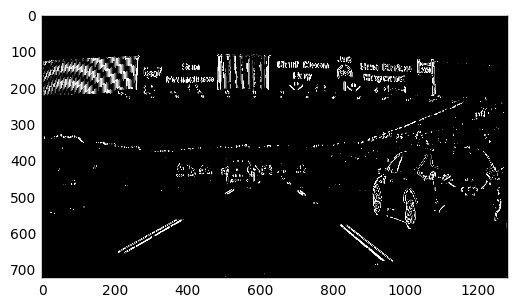

In [6]:
combined = np.zeros_like(dir_binary)
combined[((gradx == 1)&(grady==1))|((mag_binary==1)&(dir_binary==1))] = 1
plt.imshow(combined, cmap='gray')
print(combined)

In [26]:
histo = np.sum(combined[combined.shape[0]/2:,:], axis = 0)
# plt.plot(histo)
print(combined.shape)
print(histo.shape)
mid_point = np.int(histo.shape[0]/2)
left = np.argmax(histo[:mid_point])
right = np.argmax(histo[mid_point:]) + mid_point
# print(left,right)
print(np.array(combined.nonzero()).shape)

(720, 1280)
(1280,)
(2, 36503)


C:\Users\Sky\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':
